Qué son los features?

- Variables de entrada 

- los usamos para una inferencia o prediccion en nuestro modelo

Más features siempre es mejor ?

**No**
<br>
por qué? 
- pueden ser features irrelevantes para la información.
- pueden tener valores faltantes que afecten nuestro modelo generando sesgo significativo perdiendo la capacidad de predicción.
- pueden generar mayor costo computacional.
- pueden introducir ruido.

**Sesgo y Varianza (Bias & Variance)**

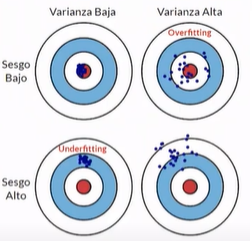

**Sesgo:** que tan lejos estamos del centro de la diana, es decir que capacidad tenemos de optener el valor que buscamos predecir o de dicho de otra forma, que tan acertadas son nuestras predicciones.

**Varianza:** Cuanto varia la prediccion segun los datos que utilicemos para el entrenamiento 



<span style="color:red">**Aviso importante**</span>

**Underfiting**: es un escenario donde el modelo es muy genralizado, nuestro modelo no está captando la relacion que existe entre los features y nuestra variable de salida. <span style="color:green">**posible solución**</span> por lo cual tenemos que buscar variables con mayor significado o combinaciones o transformaciones de esta variable para poder llegar a nuestra variable de salida.

**Overfiting**: es un escenario donde el modelo aparentemente es bueno, pero no va a dar datos cercanos a la predicción, es decir que nuestro modelo es demaciado complejo y nuestro algoritmo lo que va a hacer es intentar ajustarse a los datos que tenemos pero no se va a comportar tan bien con datos del mundo real, <span style="color:green">**posible solución**</span> podemos intentar seleccionar los features de una manera  mas critica, descartando aquellos que no aporten informaciòn o combinando algunos para quedarnos con la informaciòn que es realmente importante 

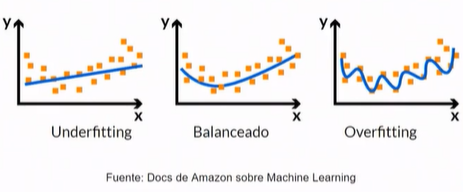

<span style="color:Dodgerblue">**Qué podemos hacer en terminos técnicos?**</span>

- Técnicas de feature selection y Feature extraction: en este caso lo que hacemos es tomar nuestros features que están en una dimensión muy grandee intentar convertirlos a un espacio menor que es realmente inportante para nuestro modelo 
- Regularización: esta técnica se usa en varios modelos lineales incluso en 
- Balanceo: Oversampling y Undersampling: es útil cuando tenemos los datos desvalanceados, por ejemplo si tenemos un problema de clasificacion y tenemos muchos ejemplos de solo una clase, lo que podemos aplicar es esta técnica, que trata de balancear nuestro conjuntos.

## A conticuación vamos a hablar de reducción de dimensionalidad 

para esto vamos a empplear **PCA** (principal componente analysis) en español mas conocido como análisis de componentes principales 

Es muy común cuando se va a modelar en Machine Learning tener una gran cantidad de features y que las relaciones de estos con la variable de salida no siempre sea tan clara, por otra parte tambien se puede encontrar que las relaciones entre estos features no siempre sea tan clara. Por ende es importante antes de correr nuestros modelos de inteligencia artificial procesemos estas variables, hagamos un análisis y entendamos que es lo que estamos empleando para generar el modelo.

## Cuando podemos emplear el PCA ?

1. Cuan tenemos mucho features y no estamos seguros de la relacion entre estos y la variable de salida, es decir las relaciones entre las variables no son tan sencillas, no son linealmente separables.
2. Cuando tenga overfiting.
3. Alto coste computacional.

## Solución PCA
lo que quiere PCA es intentar combinar diferentes features de nuestro dataset, formando features artificiales pero que mantengan la misma información que en nuestro caso se tratará de la varianza de esos features.

Reducir la complejidad del problema:
1. Selecciona solamente las variables relevantes.
2. Combinandolas en nuevas variables que mantengas la información más importante.

#### El algoritmo de PCA intenta encontrar la información más importante empleando los siguientes pasos matemáticos 

1. Calcularemos la matriz de covarianza, lo cual nos permite ver la relación de los features entre si.

2. Hallamos los vectores propios de esta mátriz, los cuales non indican que tanto cambio y que tan fuerte es la varianza de estos valores entre si y nos va ayudar a identificar cuales son las relaciones mas fuertes de las cuales vamos a poder extraer más información.

3. Ordenamos del que tenga más valor al que tenga menos valor y escogemos los vectores propios con mayor variabilidad, los que tengan el mayor valor van a tener el mayor peso, estos van a representar la mayor info para nuestro modelo de inteligencia artificial.


#### variaciones de PCA 
Hay unas variaciones de PCA en sklearn
- **IPCA**: PCA incremental: sirve cuando no tenemos mucha RAM para usar, funciona muy bien en estos casos.

- **KPCA**: si nuestros datos tienen una estructura mucho mas compleja donde no tengamos linealidad, otra de las implementaciones que se haga puede ser el KPCA, que está orientado a las funciones de kernel.



## Implementación de PCA 

#### Importando paquetes 

In [4]:
#importando paquetes 

import pandas as pd #se usa para manejo de dataframes 
import sklearn #se usa para ML
import matplotlib.pyplot as plt #se usa para gráficar 

from sklearn.decomposition import PCA #del modulo decomposicion de sklearn vamos a importar el algoritmo PCA

from sklearn.decomposition import IncrementalPCA#del modulo decomposicion de sklearn vamos a importar el algoritmo IPCA
#Es decir incremental PCA


### Importando modelo de clasificacion 

en este caso vamos a usar una regresion logistica 
<br>
<br>
vamos a realizar una comparacion entre estas dos implementaciones para demostrar que nos van a dar un resultado casi identico 
<br>
<br>
Para hacer una prueba del rendimiento de las dos implementaciones, vamos a utilizar un clasificador en este caso usaremos un clasificador lineal, que va a ser la regresion logistica 
<br>
<br>
**Ojo** no se confunda se llama REGRESION logistica pero nos sirve para clasificar 


In [5]:

from sklearn.linear_model import LogisticRegression # de los modelos lineales vamos a importar LogisticRegression


Finalmente vamos a importar dos utilidades de sklearn que nos van a ayudar para preparar nuestros datos antes de mandarlos 
al entrenamiento

In [6]:
from sklearn.preprocessing import StandardScaler #importamos un escalador que nos va a permitir normalizar nuestros datos 
#para que todos esten dentro de la misma escala  de cero a 1 

from sklearn.model_selection import train_test_split #herramienta para partir nuestros datos en el conjunto de prueba y entrenamiento 


In [7]:
#Si tenemos un archivo con muchos scripts es normal que tengamos uno que sea el principal, el cual corra todo el flujo de ejecucion 
#para identificar cual es este archivo vamos a usar esta liena 

#si este es el script principal que vamos a ejecutar siga el siguiente proceso 
if __name__== '__main__':
    dt_heart= pd.read_csv('D:\\Cursos\\M_PLATZI\\recursos del curso de ML platzi\\data\\heart.csv')#importando del archivo csv del dataset
    print(dt_heart.head(5)) #aqui lo que hacemos es mostrar los primeros 5 registros del dataset
    
    dt_features= dt_heart.drop(['target'],axis=1)# eliminamos la columna target
    #nos toca especificar en axis=1, porque es una columna
    #Ojo no se elimina del archivo csv sino del data set denominado features
    
    dt_target = dt_heart['target'] #aqui se selecciona la columna target 
    #y se asigna en la variable dt_target
  
    
    #Necesitamos si o si normalizar nuestros 
    dt_features = StandardScaler().fit_transform(dt_features)#aplicamos normalizacion de los datos 
    #medialte la funcion 'StandardScaler().fit_transform' lo que hace esta funcion es cargar los datos
    #ajustar nuestro modelo y aplicar la transformacion
    #en este caso sobre dt_features 
    
    #partimos el conjunto de datos en el conjunto de prueba y entrenamiento 
    #ojo siempre va en este orden X_train,X_test, y_train, y_test
    X_train,X_test, y_train, y_test= train_test_split(dt_features, dt_target,test_size=0.3,random_state=42)
    #tenemos variables opcionales como test_size en este caso es 0.3 es decir 30% de todo nuestro conjunto 
    #destinado para un conjunto de pruebas 
    #ramdom_state es otra variable opcional que va a ser mi semilla

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Comprobando la forma de nuestros datos de entrenamiento y target

esto es importante, pues tienen que tener un número igual de registros (filas) para que no vaya a entrar en conflicto el modelo

In [3]:
#.shape parametro propio de pandas, nos va a dar la forma de nuestra tabla 
X_train.shape #la forma de nuestro conjunto de entrenamiento 717 registros y 13 columnas

(717, 13)

In [4]:
y_train.shape #forma de nuestro dato de target, tiene 717 registros y una sola columna

(717,)

### Configuración algoritmo PCA


Se crea la variable pca, ojo ese número de componentes es opcional. Por defecto si no le pasamos ningun parametro, va a ser igual al mínimo entre el número de muestras y el numero de features. es decir que si nuestro data set tiene 500 registros y 13 columnas, el minimo es 13 columnas por ende PCA tomaría este númer.
<br>
<br>
Pero esto no tendría ningun sentido porque estariamos usando el mismo número de componentes que de columnas originales. En este caso solo tomaremos 3 componentes es decir `pca = PCA(n_components=3)`

In [ ]:
pca = PCA(n_components=3)

posteriormente llamamos a la funcion de fit, aplicada a los datos de entrenamiento, para que PCA se ajuste a nuestros datos de entrenamiento 

In [ ]:
pca.fit(X_train)

### Configurando incremental PCA

Lo que tenemos que tener en cuenta es que en incremental PCA vamos a tener un componente que va a ser el batch o de bloque, debemos recordar que incremental PCA no manda a todos los datos a entrenar al mismo tiempo sino que crea pequeños bloques llamados batch donde va entrenandolos poco a poco y combinandolos en el resultado final.

In [ ]:
ipca = IncrementalPCA(n_components=3, batch_size=10)

posteriormente llamamos a la funcion de fit, aplicada a los datos de entrenamiento, para que incremental PCA se ajuste a nuestros datos de entrenamiento.

In [ ]:
ipca.fit(X_train)

En el eje x vamos a llamar a los numeros entre cero y la cantidad de componentes que decidimos tomas, es decir vamos a usar la range para que el eje x tome la de cero hasta la longitudque de los componentes que me generó automáticamente pca `range(len(pca.explained_variance_)`.
<br>
<br>
Ahora en el eje y vamos a poner el valor de la importancia  de cada uno de estos componentes, para poder identificar cuales son realmente importantes para nuestro modelo, esto lo vamos a hacer graficando contra la variable `pca.explained_variance_ratio_`
<br>
<br>
las tres componenetes se ven en los valores 0,1 y 2 del eje x de la gráfica. 

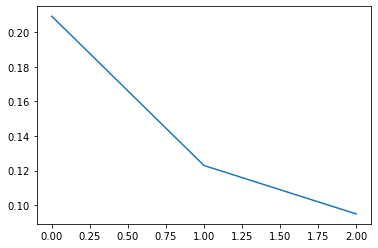

In [12]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()
#### recordar ponerle nombre a los ejes y a la gráfica
#nuestro algoritmo pca nos está aportando información valiosa

### Configuración del modelo de clasificación de regreción logística 

Primero configuramos losgistic regresion la cual nos va a pedir un solver en este caso el solver a usar será lbfgs `LogisticRegression(solver='lbfgs')`.
Este parametro nos va a evitar algunas advertencias y errores en el futuro.

In [6]:
#Vamos a hacer una comparación entre los dos algoritmos 

#configurando la variable logistic
logistic = LogisticRegression(solver='lbfgs')

#vamos a usar el solver lbgfgs 
#ya teniendo configurada nuestra regresion logistica vamos a aplicar pca 

Para que nuestra prueba sea exitosa es importante que apliquemos pca tanto en nuestro conjunto de entrenamiento, como en el de prueba.
El transform es la aplicacion del algoritmo como tal sobre el conjunto de entrenamiento y test.

In [7]:
dt_train = pca.transform(X_train) #conjunto de entrenamiento
dt_test = pca.transform(X_test)#conjunto de test

A continuacion mandamos nuestros conjuntos de prueba ya entrenamiento a la regresion logística ya habiendo aplicado el PCA a ambos conjuntos de datos 

In [8]:
#regresion logistica (conjunto de entrenamiento )
logistic.fit(dt_train,y_train) 

LogisticRegression()

Para poder medir la efectividad del modelo vamos a calcular el accuracy del modelo `logistic.score(dt_test, y_test)`

In [9]:
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857


#### Hacemos los mismos pasos anteriores pero ahora en IPCA

In [10]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)

LogisticRegression()

In [11]:
print("SCORE IPCA: ", logistic.score(dt_test, y_test))#imprimimos el resultado 
#de nuestro entrenamiento 

SCORE IPCA:  0.8051948051948052


el data set que teniamos, originalmente tenía 13 features, utilizando PCA solo necesitamos 3 features artificiales que nos devuelve PCA para llegar a un resultado suficientemente bueno, entonces estamos ahorrandonos coste computacional y estamos usando la informacion que es realmente importante para nuestro modelo.

# Capitulo 2
### Funciones Kernels y KPCA

los **kernels** son funciones matemáticas que nos ayudan a mandar unos datos de una dimension a dimensiones mas altas.
si tengo unos datos muy complejos y no puedo clasificarlos con lineas peuso usar kernels para hacer una mejor clasificacion.

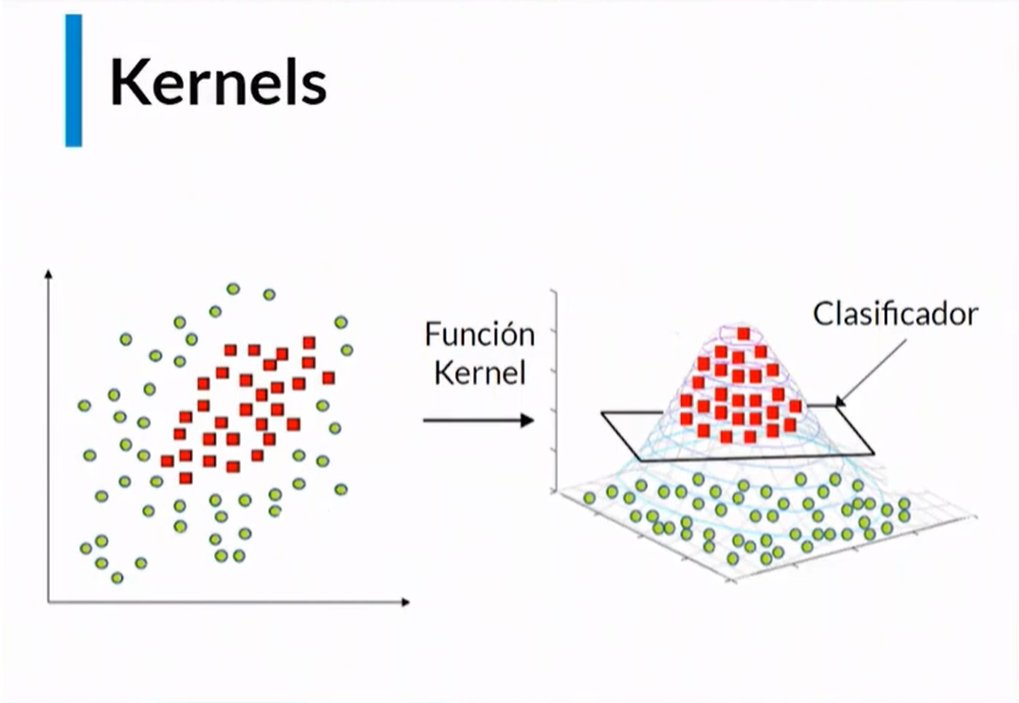

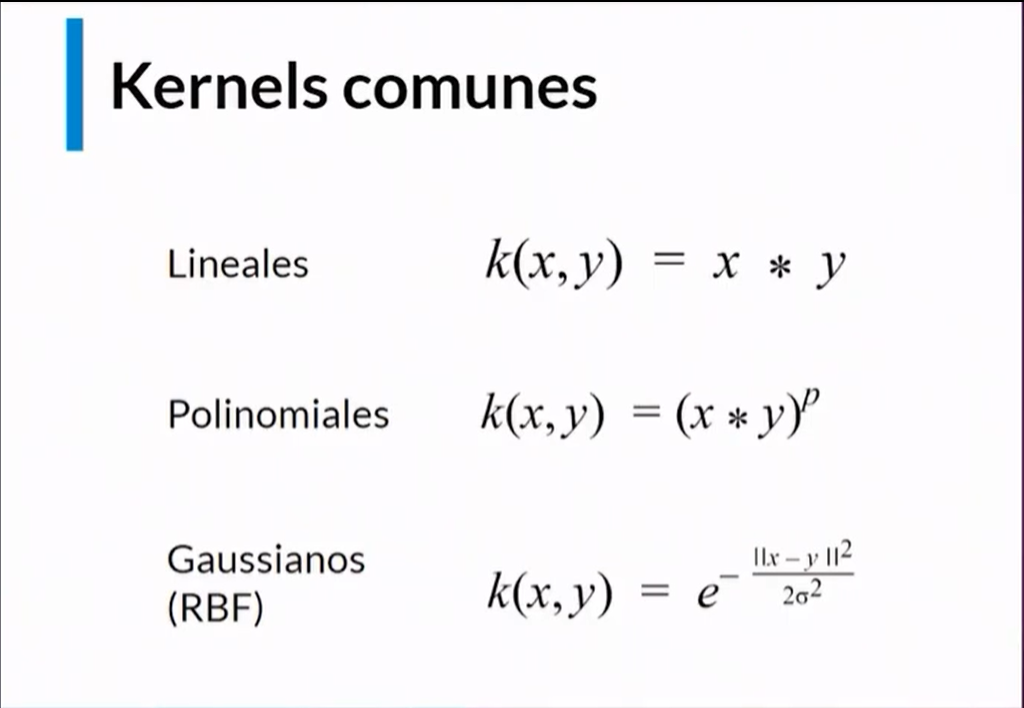

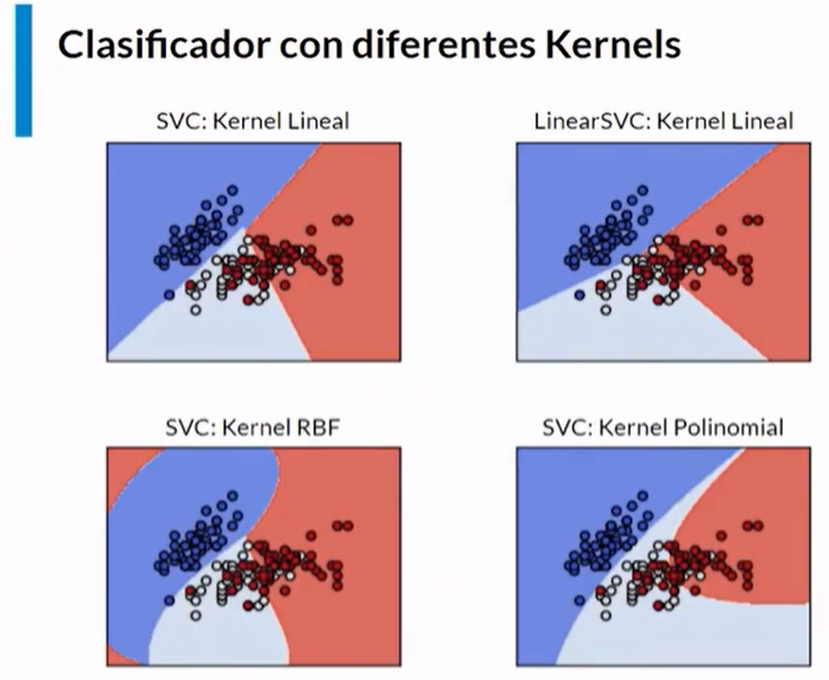

### Inicio practica de la aplicacion de Kernels 

In [ ]:
## Importando librerias

from sklaearn